<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
Transformers for classification
</div>



In [ ]:
import tensorflow as tf
from keras.utils import plot_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences


<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Load the dataset
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [ ]:
max_features = 10000 # Use top 10000 words
maxlen = 100 # Cut texts after this number of words

# Load the data and label
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequcnes to ensure consistent input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(25000, 100)

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Create the transformer block
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [ ]:
def transformer_block(inputs, num_heads, ff_dim, dropout_rate):
    # Multi-head self-attention
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attention_output = layers.Dropout(dropout_rate)(attention_output)
    attention_output = layers.LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed Forward Network
    ffn_output = layers.Dense(ff_dim, activation="relu")(attention_output)
    ffn_output = layers.Dense(inputs.shape[-1])(ffn_output)
    ffn_output = layers.Dropout(dropout_rate)(ffn_output)
    output = layers.LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)

    return output

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Complete model
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [ ]:
def build_transformer_model(input_shape, num_heads=2, ff_dim=64, dropout_rate=0.1):
    inputs = layers.Input(shape=input_shape)

    # Embedding layer
    x = layers.Embedding(input_dim=max_features, output_dim=ff_dim)(inputs)

    # Apply Transformer block
    x = transformer_block(inputs=x, num_heads=num_heads, ff_dim=ff_dim, dropout_rate=dropout_rate)

    # Global average pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Dense Layer for binary classification
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.1)(x)

    # Output layer
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])

    return model

In [ ]:
# Create the modle
model = build_transformer_model(input_shape=(maxlen,))

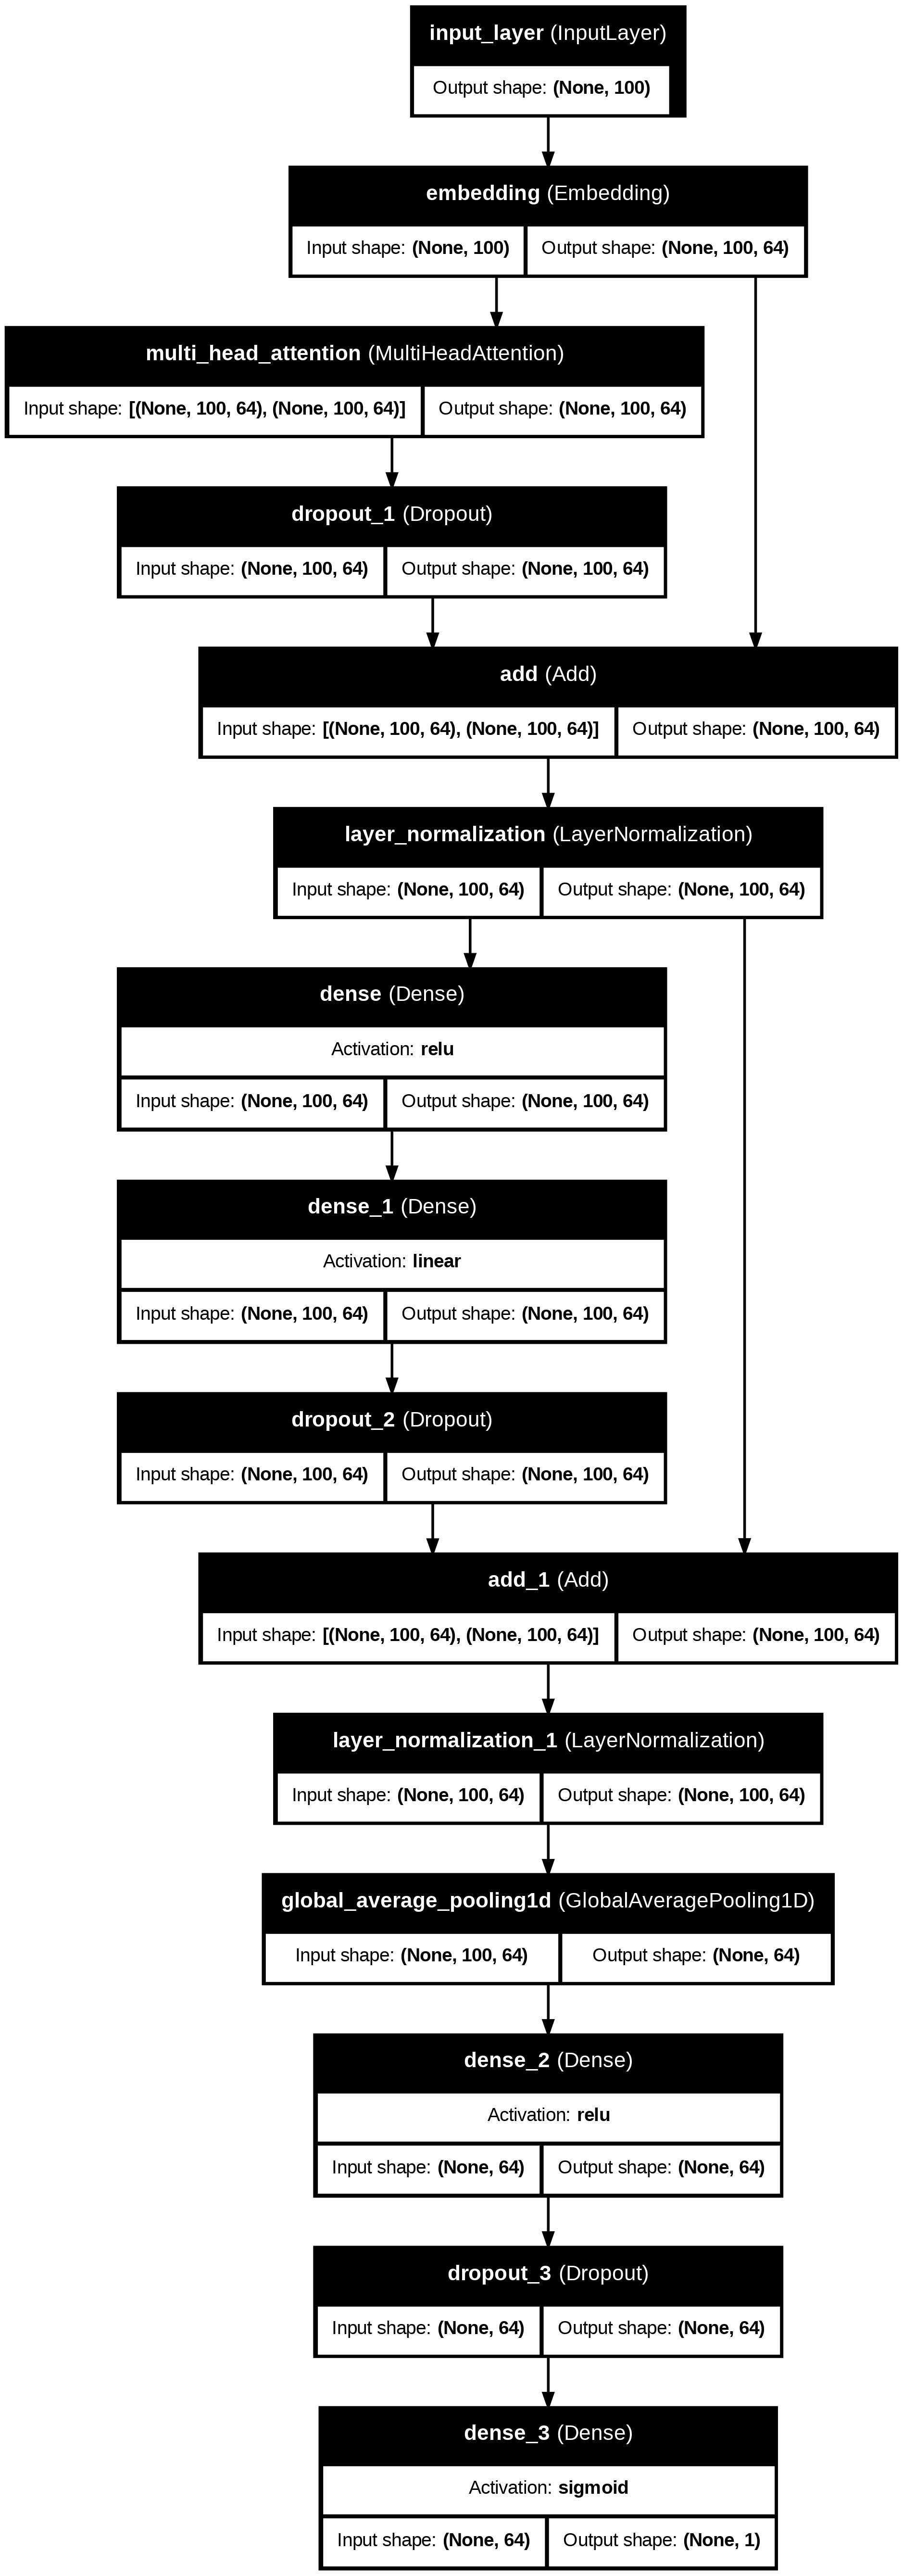

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Train the model
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6575 - loss: 0.5996 - val_accuracy: 0.8355 - val_loss: 0.3679
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8706 - loss: 0.3115 - val_accuracy: 0.8459 - val_loss: 0.3499
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9075 - loss: 0.2374 - val_accuracy: 0.8355 - val_loss: 0.3844
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9228 - loss: 0.2096 - val_accuracy: 0.8411 - val_loss: 0.3884
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9340 - loss: 0.1860 - val_accuracy: 0.8381 - val_loss: 0.4220
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9458 - loss: 0.1660 - val_accuracy: 0.8257 - val_loss: 0.4539
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9523 - loss: 0.1457 - val_accuracy: 0.8302 - val_loss: 0.4867
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9586 - loss: 0.1330 - val_accuracy: 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8210 - loss: 0.5791
Test accuracy: 0.8214399814605713
Test loss: 0.5787373781204224


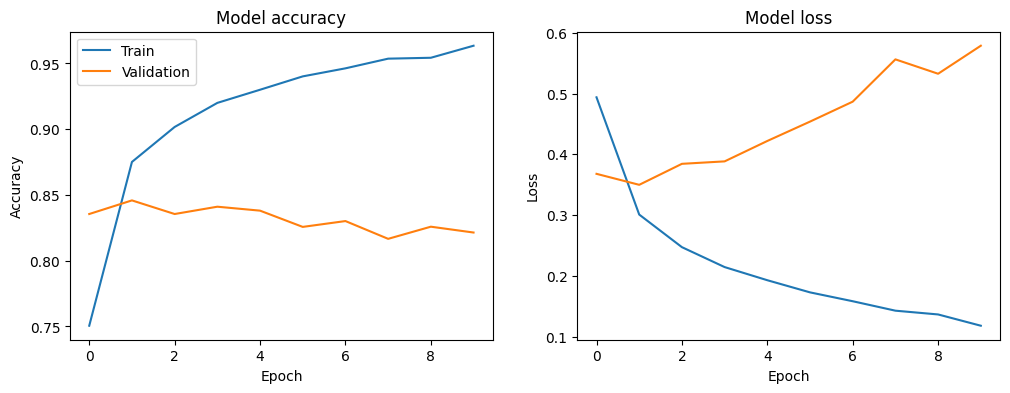

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1,2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()